In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [100]:
MANIPULATIONS = ["point33", "point5", "point66", "minus1"]
COLORS = ["BLUE", "RED", "GREEN", "ORANGE"]
BASELINE = "test_filtered"
METRIC = "Recall@1"

In [101]:
def get_performance_df(metric, condition):
    path = f"evaluation_results/{condition}/mdetr_detailed.csv"
    df = pd.read_csv(path)
    df = df[df["metric"].str.startswith(f"{metric}_")]
    df["metric"] = df["metric"].str.replace(f"{metric}_","")
    df = df.rename(columns={"metric":"Image_Id"," avg":metric})
    df = df.set_index("Image_Id").sort_index()
    df = df.drop("all",axis=0)
    return df

def get_performance_df_with_difference(metric, condition):
    df_performance_baseline = get_performance_df(metric, BASELINE)
    df_performance_baseline = df_performance_baseline.rename(columns={metric:"Baseline"})
    df_performance_m = get_performance_df(metric, condition)
    df_complete = df_performance_baseline.join(df_performance_m)
    df_complete[f"Difference"] = df_complete[metric]-df_complete["Baseline"]
    return df_complete


def get_sentence_metric_df(condition):
    condition = f"test_scrambled_{condition}" if condition in MANIPULATIONS else condition
    condition = condition.replace("minus", "-")
    path = f"flickr_test_datasets_sentence_metrics/final_flickr_separateGT_{condition}_summary.csv"
    df = pd.read_csv(path)
    df = df.set_index("Image_Id").sort_index()
    return df

def get_sentence_metric_df_with_baseline(condition):
    df_baseline = get_sentence_metric_df(BASELINE)
    df_baseline = df_baseline.rename(columns={"Max_Width":"Base_Max_Width","Mean_Width":"Base_Mean_Width","Max_Height":"Base_Max_Height","Mean_Height":"Base_Mean_Height"})
    df = get_sentence_metric_df(condition)
    df = df.join(df_baseline)
    return df

def get_sentence_distance_df(condition):
    assert condition != BASELINE
    df = pd.read_csv("flickr_test_datasets_sentence_metrics/normalized_damerau_levenshtein_distances.csv")
    df = df.rename(columns={f"DL_Dist_{condition.replace('minus','-')}":"Damerau Levenshtein Distance"})
    df = df[["Image_Id","Damerau Levenshtein Distance"]].set_index("Image_Id")
    return df

### Difference in Performance on Sentence Level

In [102]:
df_performance_baseline = get_performance_df(METRIC, BASELINE)
df_performance_baseline = df_performance_baseline.rename(columns={METRIC:"Baseline"})
dfs = []

for i,m in enumerate(MANIPULATIONS):
    df_performance_m = get_performance_df(METRIC, m)
    df_complete = df_performance_baseline.join(df_performance_m)
    df_complete[f"Diff {METRIC}"] = df_complete[METRIC]-df_complete["Baseline"]
    df_complete = df_complete.rename(columns={METRIC:"Manipulation"})
    df_complete["Manipulation"] = m
    dfs.append(df_complete)
df = pd.concat(dfs)

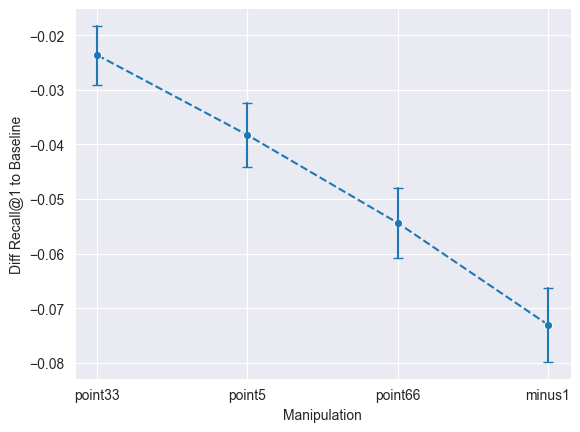

In [103]:
#plt.plot(MANIPULATIONS, [0 for _ in MANIPULATIONS], color="black", linestyle="dashed")
sns.lineplot(data=df, x="Manipulation", y=f"Diff {METRIC}",marker="o",err_style="bars",linestyle='dashed',err_kws={'capsize':3.5})
plt.ylabel(f"Diff {METRIC} to Baseline")
sns.despine()

### Max Branching Width and Max Branching Height (Baseline)

In [104]:
df_performance = get_performance_df(METRIC, BASELINE)
df_sentence = get_sentence_metric_df(BASELINE)
df_complete = df_performance.join(df_sentence)

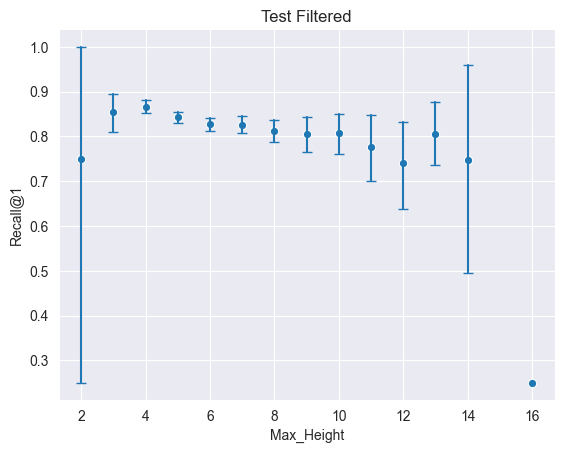

In [105]:
sns.lineplot(data=df_complete, x="Max_Height",y=METRIC,marker="o",err_style="bars",linestyle='',err_kws={'capsize':3.5})
plt.title("Test Filtered")
sns.despine()

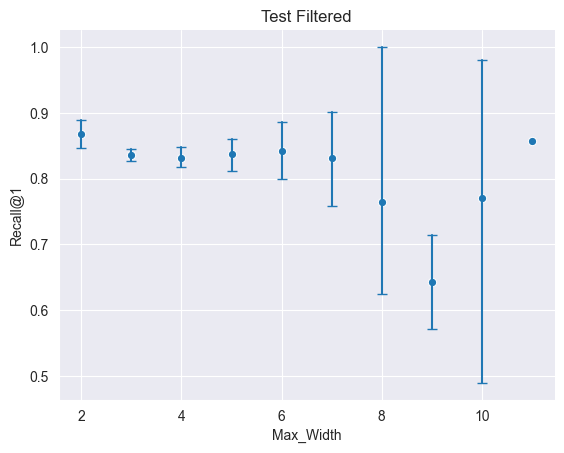

In [106]:
sns.lineplot(data=df_complete, x="Max_Width",y=METRIC,marker="o",err_style="bars",linestyle='',err_kws={'capsize':3.5})
plt.title("Test Filtered")
sns.despine()

### Max Branching Width (with Respect to unmodified Sentences)

##### Absolute Performance

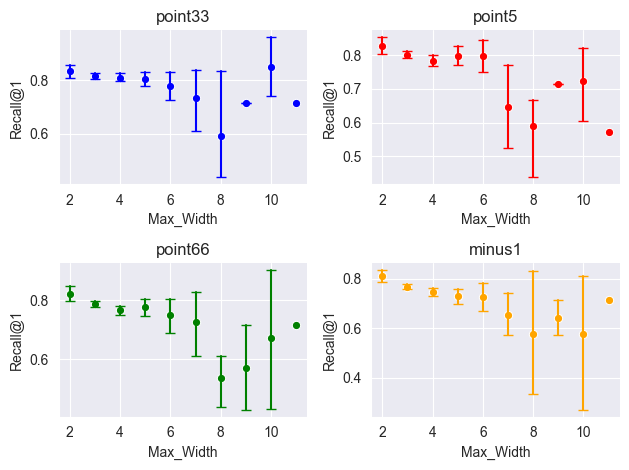

In [107]:
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
sentence_metric = "Max_Width"
for i,m in enumerate(MANIPULATIONS):
    df_performance = get_performance_df(METRIC, m)
    df_sentence = get_sentence_metric_df(BASELINE)
    df_complete = df_performance.join(df_sentence)
    sns.lineplot(data=df_complete, x=sentence_metric,y=METRIC,ax=ax[i],color=COLORS[i],marker="o",err_style="bars",linestyle='',err_kws={'capsize':3.5})
    ax[i].set_title(m)
sns.despine()
plt.tight_layout()

##### Difference in Performance to Baseline

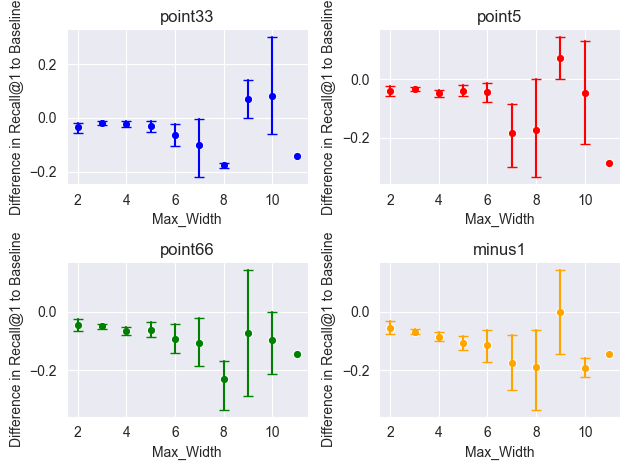

In [108]:
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
sentence_metric = "Max_Width"
for i,m in enumerate(MANIPULATIONS):
    df_performance = get_performance_df_with_difference(METRIC, m)
    df_sentence = get_sentence_metric_df(BASELINE)
    df_complete = df_performance.join(df_sentence)
    sns.lineplot(data=df_complete, x=sentence_metric,y="Difference",ax=ax[i],color=COLORS[i],marker="o",err_style="bars",linestyle='',err_kws={'capsize':3.5})
    ax[i].set_ylabel(f"Difference in {METRIC} to Baseline")
    ax[i].set_title(m)
sns.despine()
plt.tight_layout()

### Max Branching Height (with Respect to modified Sentences)

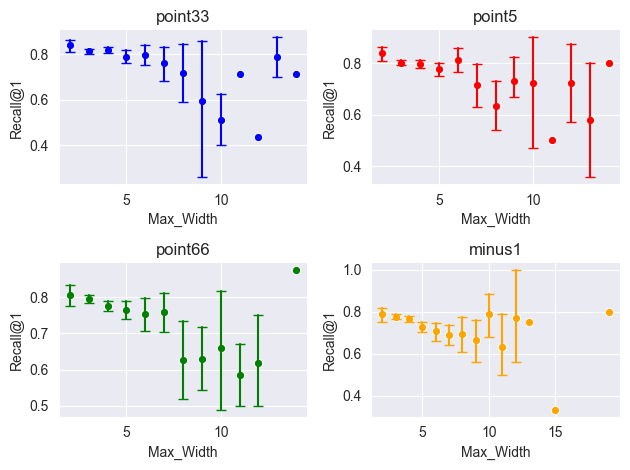

In [109]:
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
sentence_metric = "Max_Width"
for i,m in enumerate(MANIPULATIONS):
    df_performance = get_performance_df(METRIC, m)
    df_sentence = get_sentence_metric_df(m)
    df_complete = df_performance.join(df_sentence)
    sns.lineplot(data=df_complete, x=sentence_metric,y=METRIC,ax=ax[i],color=COLORS[i],marker="o",err_style="bars",linestyle='',err_kws={'capsize':3.5})
    ax[i].set_title(m)
sns.despine()
plt.tight_layout()

### Max Branching Height (with Respect to unmodified Sentences)

##### Absolute Performance

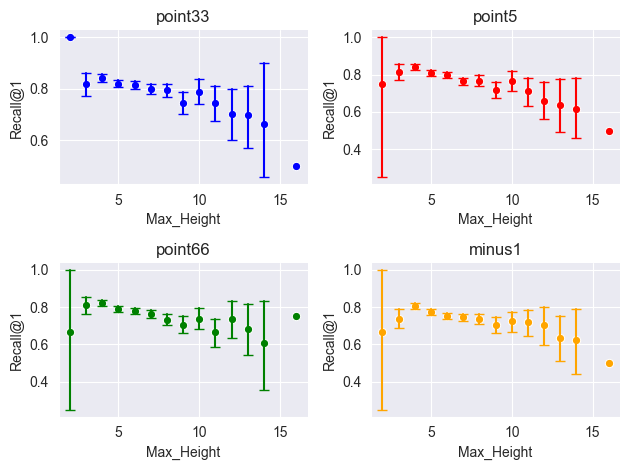

In [110]:
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
sentence_metric = "Max_Height"
for i,m in enumerate(MANIPULATIONS):
    df_performance = get_performance_df(METRIC, m)
    df_sentence = get_sentence_metric_df(BASELINE)
    df_complete = df_performance.join(df_sentence)
    sns.lineplot(data=df_complete, x=sentence_metric,y=METRIC,ax=ax[i],color=COLORS[i],marker="o",err_style="bars",linestyle='',err_kws={'capsize':3.5})
    ax[i].set_title(m)
sns.despine()
plt.tight_layout()

##### Difference in Performance to Baseline

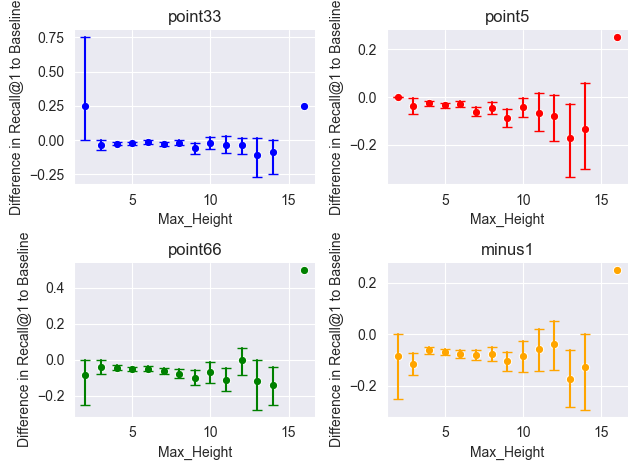

In [111]:
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
sentence_metric = "Max_Height"
for i,m in enumerate(MANIPULATIONS):
    df_performance = get_performance_df_with_difference(METRIC, m)
    df_sentence = get_sentence_metric_df(BASELINE)
    df_complete = df_performance.join(df_sentence)
    sns.lineplot(data=df_complete, x=sentence_metric,y="Difference",ax=ax[i],color=COLORS[i],marker="o",err_style="bars",linestyle='',err_kws={'capsize':3.5})
    ax[i].set_ylabel(f"Difference in {METRIC} to Baseline")
    ax[i].set_title(m)
sns.despine()
plt.tight_layout()

### Max Branching Height (with Respect to modified Sentences)

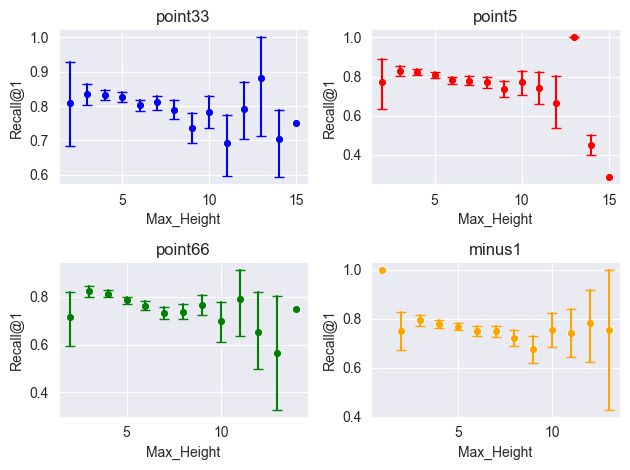

In [112]:
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
sentence_metric = "Max_Height"
for i,m in enumerate(MANIPULATIONS):
    df_performance = get_performance_df(METRIC, m)
    df_sentence = get_sentence_metric_df(m)
    df_complete = df_performance.join(df_sentence)
    sns.lineplot(data=df_complete, x=sentence_metric,y=METRIC,ax=ax[i],color=COLORS[i],marker="o",err_style="bars",linestyle='',err_kws={'capsize':3.5})
    ax[i].set_title(m)
sns.despine()
plt.tight_layout()

### Regression Sentence Metrics (with Respect to unmodified Sentences)

In [113]:
dfs = []
for i,m in enumerate(MANIPULATIONS):
    df_performance = get_performance_df(METRIC, m)
    df_sentence = get_sentence_metric_df(BASELINE)
    df_distance = get_sentence_distance_df(m)
    df_complete = df_performance.join(df_sentence)
    df_complete = df_complete.join(df_distance)
    df_complete["Condition"] = m
    dfs.append(df_complete)
df_performance = get_performance_df(METRIC, BASELINE)
df_sentence = get_sentence_metric_df(BASELINE)
df_complete = df_performance.join(df_sentence)
df_complete["Damerau Levenshtein Distance"] = 0.0
df_complete["Condition"] = BASELINE
dfs.append(df_complete)

df = pd.concat(dfs)
df = df.rename(columns={"Recall@1":"Recall", "Damerau Levenshtein Distance":"DL_Dist"})

In [114]:
model = smf.ols(f"Recall~Max_Height+Max_Width",data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Recall   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     132.4
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           6.97e-58
Time:                        18:43:38   Log-Likelihood:                -1532.6
No. Observations:               23310   AIC:                             3071.
Df Residuals:                   23307   BIC:                             3095.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9138      0.008    115.517      0.0

In [121]:
model = smf.ols(f"Recall~C(Condition, Treatment(reference='{BASELINE}'))",data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Recall   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     54.76
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           4.95e-46
Time:                        18:46:20   Log-Likelihood:                -1555.2
No. Observations:               23310   AIC:                             3120.
Df Residuals:                   23305   BIC:                             3161.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

### Damerau-Levenshtein Distance

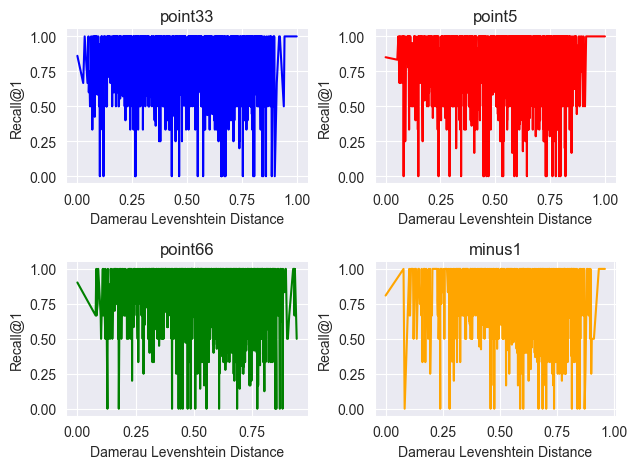

In [115]:
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
distance = "Damerau Levenshtein Distance"
for i,m in enumerate(MANIPULATIONS):
    df_performance = get_performance_df(METRIC, m)
    df_distance = get_sentence_distance_df(m)
    #df_distance[distance] = np.round(df_distance[distance],3)
    df_complete = df_performance.join(df_distance)
    sns.lineplot(data=df_complete, x=distance,y=METRIC,ax=ax[i],color=COLORS[i], errorbar=None)
    ax[i].set_title(m)
sns.despine()
plt.tight_layout()

In [116]:
dfs = []
distance = "Damerau Levenshtein Distance"
for i,m in enumerate(MANIPULATIONS):
    df_distance = get_sentence_distance_df(m)
    df_distance["Manipulation"] = m
    dfs.append(df_distance)
df_distance = pd.concat(dfs)

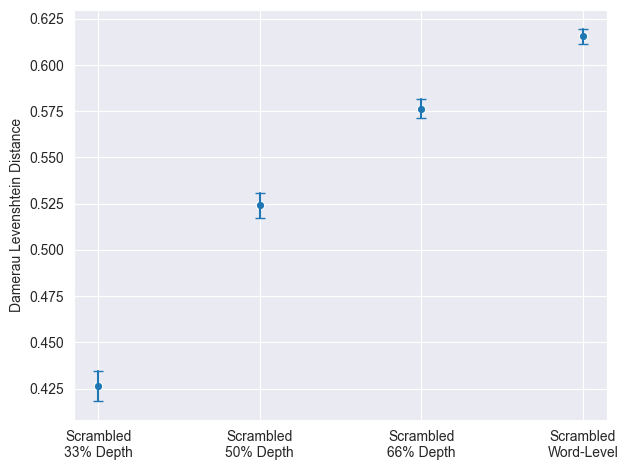

In [117]:
sns.lineplot(data=df_distance, x="Manipulation", y=distance,marker="o",err_style="bars",linestyle='',err_kws={'capsize':3.5})
plt.xticks(MANIPULATIONS, ["Scrambled\n33% Depth", "Scrambled\n50% Depth", "Scrambled\n66% Depth", "Scrambled\nWord-Level"])
plt.xlabel("")
plt.tight_layout()

In [118]:
unmodified_sentences = df_distance[df_distance[distance]==0.0]
print(f"Number of unmodified Sentences: {len(unmodified_sentences)} ({np.round(len(unmodified_sentences)/len(df_distance)*100,2)}%)")
print()
for m in MANIPULATIONS:
    print(f"{m}: {np.round(len(unmodified_sentences[unmodified_sentences['Manipulation']==m])/len(unmodified_sentences)*100,2)}%")

Number of unmodified Sentences: 1027 (5.51%)

point33: 70.69%
point5: 17.92%
point66: 10.03%
minus1: 1.36%
